In [83]:
import numpy as np
import pandas as pd
import nltk
import spacy
import requests
from bs4 import BeautifulSoup
import time
import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string

In [84]:
# Download necessary NLTK data
nltk.download('punkt')

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
data=pd.read_csv('/content/spam.csv', encoding='latin-1')
# Drop unnecessary columns and rename the necessary ones
df = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.columns = ['label', 'text']
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [86]:

def most_frequent_words(df, column, amount):
  # Combine all text into a single string
  all_words = ' '.join(df[column]).lower()

  # Remove punctuation and split into words
  words = re.findall(r'\b\w+\b', all_words)

  # Get the 5 most common words
  most_common_words = Counter(words).most_common(5)
  print("5 most frequent words:")
  for word, freq in most_common_words:
      print(f"{word}: {freq}")

def count_of_words_apear_once(df):
  # Count word frequencies
  word_freq = Counter(words)

  # Count words that appear only once
  unique_words = sum(1 for word, freq in word_freq.items() if freq == 1)
  print(f"Number of words that only appear once: {unique_words}")

def avg_words_per_message(df, column):
  df['word_count'] = df[column].apply(lambda x: len(x.split()))
  print(df['word_count'])
  average_words = df['word_count'].mean()
  print(f"Average number of words per message: {average_words:.2f}")

def total_num_of_data(df):
  total_messages = len(df)
  print(f"Total number of messages: {total_messages}")

# **Basic Analysis - Before Proccessing**

In [87]:
num_spam = len(df[df['label'] == 'spam'])
num_ham = len(df[df['label'] == 'ham'])
print(f"Number of spam messages: {num_spam}")
print(f"Number of ham messages: {num_ham}")

Number of spam messages: 747
Number of ham messages: 4825


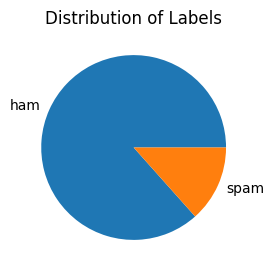

In [88]:
df.label.value_counts().plot(kind='pie', figsize=(3, 3))
plt.title('Distribution of Labels')
plt.ylabel('')  # This removes the y-label which is not meaningful in a pie chart
plt.show()

In [89]:
# Total number of messages
total_num_of_data(df)
# Average number of words per message
avg_words_per_message(df, 'text')
# 5 most frequent words
most_frequent_words(df, 'text', 5)
# Number of words that only appear once
count_of_words_apear_once(df)

Total number of messages: 5572
0       20
1        6
2       28
3       11
4       13
        ..
5567    30
5568     8
5569    10
5570    26
5571     6
Name: word_count, Length: 5572, dtype: int64
Average number of words per message: 15.49
5 most frequent words:
i: 3001
to: 2242
you: 2240
a: 1433
the: 1328
Number of words that only appear once: 72


# **Text Processing**

# Cleaning The Data

In [90]:
def data_cleaning(df, column):
  # Handle missing values
  df = df.dropna()  # Drop rows with any missing values

  # Convert text to lowercase
  df[column] = df[column].str.lower()

  # Remove punctuation
  df[column] = df[column].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

  # Remove special characters
  df[column] = df[column].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

  # Step 6: Remove stop words
  df[column] = df[column].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

  # Use the sub() method to replace URLs with the specified replacement text
  df[column] =df[column].apply(lambda x : re.sub(r'https\S*', '', x))

  # Replace empty strings with NaN
  df[column] = df[column].replace('', pd.NA)

  # Drop rows with NaN values in the specified column
  df = df.dropna(subset=[column])
  # Display the first few rows of the cleaned DataFrame
  print("Cleaned data preview:")
  print(df)
  return df

In [91]:
df = data_cleaning(df , 'text')

Cleaned data preview:
     label  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   
...    ...   
5567  spam   
5568   ham   
5569   ham   
5570   ham   
5571   ham   

                                                                                                                                         text  \
0                                                          go jurong point crazy available bugis n great world la e buffet cine got amore wat   
1                                                                                                                     ok lar joking wif u oni   
2     free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s   
3                                                                                                         u dun say early hor u c already say   
4                                                                                   

# **Basic Analysis - After Proccessing**

In [92]:
# Total number of messages
total_num_of_data(df)
# Average number of words per message
avg_words_per_message(df, 'text')
# 5 most frequent words
most_frequent_words(df, 'text', 5)
# Number of words that only appear once
count_of_words_apear_once(df)

Total number of messages: 5567
0       16
1        6
2       23
3        9
4        8
        ..
5567    20
5568     5
5569     4
5570    14
5571     3
Name: word_count, Length: 5567, dtype: int64
Average number of words per message: 9.36
5 most frequent words:
u: 1119
call: 576
2: 478
im: 471
get: 386
Number of words that only appear once: 72


# Nltk Tokenizer

In [93]:
from nltk.tokenize import word_tokenize

start_time = time.time()

# Tokenize using NLTK
df['nltk_tokens'] = df['text'].apply(word_tokenize)

nltk_time = time.time() - start_time
print(f"NLTK tokenization time: {nltk_time} seconds")
print(df['nltk_tokens'].head(10))

NLTK tokenization time: 0.59018874168396 seconds
0                                                                [go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]
1                                                                                                                                     [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]
3                                                                                                                      [u, dun, say, early, hor, u, c, already, say]
4                                                                                                               [nah, dont, think, goes, usf, lives, around, though]
5                                                        [freemsg, hey, darling, 3, weeks, word, back, id, like, fun, still, t

# SpaCy Tokenizer


In [94]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

nlp = English()
tokenizer = Tokenizer(nlp.vocab)
start_time = time.time()
tokens = tokenizer(all_words)
print(list(tokens)[:30])

spacy_time = time.time() - start_time
print(f"spaCy tokenization time: {spacy_time} seconds")

[bar, moshe, linux, mac, m1, 17, 972525757622, vlab, 811, 1417, 16, c, cpp, 4, 20, 3, 40, 40, 20, 20, 1, 10, 16, attendance, 90, pipe, c, 1400, 1, 3]
spaCy tokenization time: 0.002462148666381836 seconds


# **NLTK and SpaCy Tokenization comparison**

 NLTK returns a list of strings, which represents a tokenized word, while spaCy returns a list of spaCy token objects.  spaCy's tokenization takes approximately half of the time of NLTK.      
 Language Support:

NLTK:  offers support for tokenization in various languages, although it may require additional configurations or resources for some languages.

spaCy: designed to support multiple languages out of the box, and its tokenization capabilities are optimized for efficiency.

# Lemmatization with Nltk

In [95]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
x = all_words.split()
start_time = time.time()

for w in x:
   (w, " : ", lemmatizer.lemmatize(w, pos='n'))
time = time.time() - start_time
time

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0.0012454986572265625

In [96]:
print('15 examples of tokens where the token text differs from its lemma')
count = 0
for w in x:
    if w != lemmatizer.lemmatize(w, pos='n'):
        print(w +':' + lemmatizer.lemmatize(w, pos='n'))
        count += 1
        if count >= 15:
            break

15 examples of tokens where the token text differs from its lemma
vs:v
windows:window
vs:v


# Lemmatization with SpaCy

In [97]:
import spacy
import time
# Load spaCy model
nlp = spacy.load('en_core_web_sm')


def lemmatize_with_spacy(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

start_time = time.time()
df['lemmatized_spacy'] = df['text'].apply(lemmatize_with_spacy)
spacy_time = time.time() - start_time

print(f"Lemmatization time using spaCy: {spacy_time:.6f} seconds")


Lemmatization time using spaCy: 57.220295 seconds


In [98]:
# Initialize counter
count = 0
print('15 examples of tokens where the token text differs from its lemma')

# Print 15 examples of tokens where the token text differs from its lemma
for token in nlp(all_words):
    if token.text != token.lemma_:
        print(f"{token.text:>20} : {token.lemma_}")
        count += 1
        if count >= 15:
            break

15 examples of tokens where the token text differs from its lemma
         serverbased : serverbase
             windows : window


# **NLTK and SpaCy Lemmatization comparison**

The lemmatization process using spaCy took approximately 51.12 seconds, which is significantly slower compared to NLTK. This indicates that while spaCy offers robust NLP capabilities, it may require more processing time for lemmatization.

**Output Format:** Both NLTK and spaCy produce lists of lemmatized words.
However, the actual lemmas produced can differ slightly due to the
underlying algorithms and linguistic models.

**Processing Speed:** NLTK is significantly faster in lemmatization compared to spaCy for the given dataset.

# Stemming with Nltk

In [99]:
import time
from nltk.stem import PorterStemmer
# NLTK Stemming
def stem_with_nltk(text):
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(w) for w in words]
    return ' '.join(stemmed_words)

start_time = time.time()
df['stemmed_nltk'] = df['text'].apply(stem_with_nltk)
nltk_time = time.time() - start_time

print(f"Stemming time using NLTK: {nltk_time:.6f} seconds")

Stemming time using NLTK: 1.707835 seconds


# Stemming with spaCy - SpaCy itself does not include a stemming function


10. Print updated statistics on word count and frequent words after applying each
technique. **

In [100]:
"""def calculate_statistics(column):
    all_words = ' '.join(df[column]).split()
    word_count = len(all_words)
    frequent_words = Counter(all_words).most_common(5)
    return word_count, frequent_words
# Calculate statistics
original_word_count, original_frequent_words = calculate_statistics('text')
nltk_lemmatized_word_count, nltk_lemmatized_frequent_words = calculate_statistics('lemmatized_nltk')
spacy_lemmatized_word_count, spacy_lemmatized_frequent_words = calculate_statistics('lemmatized_spacy')
nltk_stemmed_word_count, nltk_stemmed_frequent_words = calculate_statistics('stemmed_nltk')
spacy_stemmed_word_count, spacy_stemmed_frequent_words = calculate_statistics('stemmed_spacy')

# Print statistics
print(f"Original Text: Word Count = {original_word_count}, Frequent Words = {original_frequent_words}")
print(f"NLTK Lemmatized: Word Count = {nltk_lemmatized_word_count}, Frequent Words = {nltk_lemmatized_frequent_words}")
print(f"spaCy Lemmatized: Word Count = {spacy_lemmatized_word_count}, Frequent Words = {spacy_lemmatized_frequent_words}")
print(f"NLTK Stemmed: Word Count = {nltk_stemmed_word_count}, Frequent Words = {nltk_stemmed_frequent_words}")
print(f"spaCy Stemmed: Word Count = {spacy_stemmed_word_count}, Frequent Words = {spacy_stemmed_frequent_words}") """

'def calculate_statistics(column):\n    all_words = \' \'.join(df[column]).split()\n    word_count = len(all_words)\n    frequent_words = Counter(all_words).most_common(5)\n    return word_count, frequent_words\n# Calculate statistics\noriginal_word_count, original_frequent_words = calculate_statistics(\'text\')\nnltk_lemmatized_word_count, nltk_lemmatized_frequent_words = calculate_statistics(\'lemmatized_nltk\')\nspacy_lemmatized_word_count, spacy_lemmatized_frequent_words = calculate_statistics(\'lemmatized_spacy\')\nnltk_stemmed_word_count, nltk_stemmed_frequent_words = calculate_statistics(\'stemmed_nltk\')\nspacy_stemmed_word_count, spacy_stemmed_frequent_words = calculate_statistics(\'stemmed_spacy\')\n\n# Print statistics\nprint(f"Original Text: Word Count = {original_word_count}, Frequent Words = {original_frequent_words}")\nprint(f"NLTK Lemmatized: Word Count = {nltk_lemmatized_word_count}, Frequent Words = {nltk_lemmatized_frequent_words}")\nprint(f"spaCy Lemmatized: Word Co

# **Web Scraping**


In [101]:

url = "https://finance.yahoo.com/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAACHRzA667AARXS__2v5de8mNTKOyFF7jW-cvNi0GO_xT-fg69PydO0Xa5iRXetlJA6ZBGR8ToumsedNBLhkHE7kaWLicN4ilmYfg8EShk1l-Suxct2famqmVFYAZhpPEHLJQLWiwAb9eATIGeIh_NniR12bb44fwIwKtuw-o1c1i"  # Replace with the actual URL
response = requests.get(url)

if response.status_code == 200:
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    # Extracting post texts from a hypothetical social media profile
    posts = soup.find_all('p')  # This will vary based on the actual HTML structure
    for post in posts:
        post.get_text()
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


In [102]:
len(posts)
df = pd.DataFrame(posts, columns=['posts'])
print(df)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         posts
0                                                                        

# **Basic Analysis - Before Proccessing**

In [104]:
# Total number of messages
total_num_of_data(df)
# Average number of words per message
avg_words_per_message(df, 'posts')
# 5 most frequent words
most_frequent_words(df, 'posts', 5)
# Number of words that only appear once
count_of_words_apear_once(df)

Total number of messages: 19
0      28
1      14
2     136
3      13
4      15
5      17
6      22
7      18
8      28
9      84
10      8
11     82
12     33
13     19
14     82
15      7
16     14
17     28
18      6
Name: word_count, dtype: int64
Average number of words per message: 34.42
5 most frequent words:
the: 34
to: 19
for: 11
is: 10
and: 10
Number of words that only appear once: 72


In [106]:
# Function to print word statistics
def print_word_statistics(text, description):
    str = " ".join(text)
    print(str)
    words = word_tokenize(str)
    total_words = len(words)
    unique_words = len(set(words))
    word_freq = Counter(words)
    most_common_words = word_freq.most_common(10)

    print(f"--- {description} ---")
    print(f"Total words: {total_words}")
    print(f"Unique words: {unique_words}")
    print("Most common words:")
    for word, freq in most_common_words:
        print(f"{word}: {freq}")
    print("\n")

# Initial word statistics (before text processing)
#print_word_statistics(df['posts'], "Before Text Processing")

# Data cleaning

In [107]:
column = 'posts'
data_cleaning(df, column)

Cleaned data preview:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                posts  \
0                                                                                                                                                                                                        

,posts,word_count
0,experiencing temporary issues market data page currently delayed please bear us address restore personalized lists,28
1,job openings fell sharply april us labor market continues cool,14
2,stocks dji ixic gspc pressure weak jolts data pointed signs economic cracks job openings falling lowest level since february 2021 gamestop gme rally retreating meme trade influencer roaring kitty reportedly faces potential ban etrade due market manipulation concerns investors also watching latest quarterly earnings hewlett packard enterprises hpe crowdstrike crwd see ai impacting businesses yahoo finance trending tickers include core scientific inc corz viking therapeutics vktx carnival corporation ccl key guests include310 pm et michael kantrowitz piper sandler chief investment strategist325 pm et rebecca babin cibc private wealth us senior energy trader345 pm et daron acemoglu mit economics professor440 pm et mickey drexler alex mill chairman former gap ceo,136
3,fed rate decision might influence savings cd interest earnings,13
4,nvidia suddenly nipping apples heels looking become secondmost valuable us company,15
5,microsoft maintained position leading global company market cap rising 66 308 trillion,17
6,benchmark reverted back 2023 ways may six large tech stocks accounting majority gains,22
7,drama surrounding ceo elon musks pay package among issues helping tesla lag magnificent 7 peers,18
8,update posted 9 pm last night nyse said would bust erroneous trades berkshire hathaway stock 60371830 share,28
9,ultrawealthy 1 often dominates financial headlines real question americans whether net worth comparable peers understanding takes top 10 age provide valuable insight financial standing reveal milestones success different stages life dont miss average american couple saved much money retirement compare rich heres americans think,84


# **Basic Analysis - After Proccessing**

In [109]:
# Total number of messages
total_num_of_data(df)
# Average number of words per message
avg_words_per_message(df, 'posts')
# 5 most frequent words
most_frequent_words(df, 'posts', 5)
# Number of words that only appear once
count_of_words_apear_once(df)

Total number of messages: 19
0      28
1      14
2     136
3      13
4      15
5      17
6      22
7      18
8      28
9      84
10      8
11     82
12     33
13     19
14     82
15      7
16     14
17     28
18      6
Name: word_count, dtype: int64
Average number of words per message: 34.42
5 most frequent words:
the: 34
to: 19
for: 11
is: 10
and: 10
Number of words that only appear once: 72


# **NLTK Tokenization**

In [110]:

start_time = time.time()

# Tokenize using NLTK
df['nltk_tokens'] = df['posts'].apply(word_tokenize)

nltk_time = time.time() - start_time
print(f"NLTK tokenization time: {nltk_time} seconds")
print(df['nltk_tokens'].head(10))

NLTK tokenization time: 0.014487743377685547 seconds
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             [We, are, experiencing, some, temporary, issues, ., The, market, data, on, this, page, is, currently, delayed, ., Please, bear, with, us, as, we, address, this, and, restore, your, personalized, lists, .]
1                                                                                                                                                                                                                                                                       

# **NLTK Lemmatization**

In [111]:

# Using list comprehension to flatten the lists in the 'nltk_tokens' column
all_tokens = [token for sublist in df['nltk_tokens'] for token in sublist]

print(all_tokens)

start_time = time.time()

for w in all_tokens:
   (w, " : ", lemmatizer.lemmatize(w, pos='n'))
time = time.time() - start_time
time

['We', 'are', 'experiencing', 'some', 'temporary', 'issues', '.', 'The', 'market', 'data', 'on', 'this', 'page', 'is', 'currently', 'delayed', '.', 'Please', 'bear', 'with', 'us', 'as', 'we', 'address', 'this', 'and', 'restore', 'your', 'personalized', 'lists', '.', 'Job', 'openings', 'fell', 'sharply', 'in', 'April', 'as', 'the', 'US', 'labor', 'market', 'continues', 'to', 'cool', '.', 'Stocks', '(', '^DJI', ',', '^IXIC', ',', '^GSPC', ')', 'are', 'under', 'pressure', 'after', 'weak', 'JOLTS', 'data', 'pointed', 'to', 'signs', 'of', 'economic', 'cracks', ',', 'with', 'job', 'openings', 'falling', 'to', 'their', 'lowest', 'level', 'since', 'February', '2021', '.', 'The', 'GameStop', '(', 'GME', ')', 'rally', 'is', 'retreating', ',', 'as', 'meme', 'trade', 'influencer', "'Roaring", 'Kitty', "'", 'reportedly', 'faces', 'a', 'potential', 'ban', 'from', 'E-Trade', 'due', 'to', 'market', 'manipulation', 'concerns', '.', 'Investors', 'will', 'also', 'be', 'watching', 'for', 'the', 'latest', 

0.0067920684814453125

# **NLTK Stemming**

In [112]:
from nltk.stem import PorterStemmer
import time
# NLTK Stemming
def stem_with_nltk(text):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in all_tokens]
    return ' '.join(stemmed_words)

start_time = time.time()
stemmed_words = stem_with_nltk(all_tokens)
nltk_time = time.time() - start_time

print("Stemmed dataframe using NLTK:")
print(stemmed_words)
print(f"Stemming time using NLTK: {nltk_time:.6f} seconds")

Stemmed dataframe using NLTK:
we are experienc some temporari issu . the market data on thi page is current delay . pleas bear with us as we address thi and restor your person list . job open fell sharpli in april as the us labor market continu to cool . stock ( ^dji , ^ixic , ^gspc ) are under pressur after weak jolt data point to sign of econom crack , with job open fall to their lowest level sinc februari 2021 . the gamestop ( gme ) ralli is retreat , as meme trade influenc 'roar kitti ' reportedli face a potenti ban from e-trad due to market manipul concern . investor will also be watch for the latest quarterli earn from hewlett packard enterpris ( hpe ) and crowdstrik ( crwd ) to see how ai is impact those busi . yahoo financ trend ticker includ core scientif inc. ( corz ) , vike therapeut ( vktx ) , and carniv corpor ( ccl ) . key guest include:3:10 p.m . et michael kantrowitz , piper sandler chief invest strategist3:25 p.m . et rebecca babin , cibc privat wealth us senior energi

# **WhatsApp Analysis**

In [113]:
with open('whatsapp.txt', 'r', encoding='utf-8') as file:
    whatsapp_data = file.read()

In [114]:

import pandas as pd
import re

# Split raw data by newline
lines = whatsapp_data.strip().split('\n')

# Function to extract name and message, and remove name from message
def process_line(line):
    pattern = r'~\s*(.*?):\s*(.*)'
    match = re.search(pattern, line)
    if match:
        name = match.group(1).strip()
        message = match.group(2).strip()
        return name, message
    else:
        return None, line.strip()

# Process each line
data = []
for line in lines:
    name, message = process_line(line)
    if name:
        data.append({'name': name, 'message': message})



In [115]:
# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)
df.to_csv("/content/whatsapp_data.csv")

              name                                                message
0        Bar moshe                     ‫‏הקבוצה נוצרה על ידי ~ Bar moshe‬
1       Lil Jo’H 🎧  מישהו מכיר מורה פרטי למערכות הפעלה וגם ללמידת מכונה ?
2       Lil Jo’H 🎧                  מישהו יודע איך להוריד Linux בMac M1 ?
3            GabiL                                                לא צריך
4            GabiL                    הטרמינל של מאק הוא שווה ערך ללינוקס
..             ...                                                    ...
742       Or Cohen           מישהו עשה את הקורס למידה חישובית ( לא סמינר)
743  ליטל חוטיאקוב                          יש קבוצת ווצאפ של שפות תכנות?
744      Bar Yaron                      יש בתיאור קישור מרוכז לכל הקבוצות
745  ליטל חוטיאקוב                                                  תודה!
746      Tom Cohen                                         ‏התמונה הושמטה

[747 rows x 2 columns]


# Basic Analysis - Before Processing

In [116]:
# Total number of messages
total_num_of_data(df)
# Average number of words per message
avg_words_per_message(df, 'message')
# 5 most frequent words
most_frequent_words(df, 'message', 5)
# Number of words that only appear once
count_of_words_apear_once(df)

Total number of messages: 747
0       7
1      10
2       8
3       2
4       7
       ..
742     9
743     6
744     6
745     1
746     2
Name: word_count, Length: 747, dtype: int64
Average number of words per message: 6.00
5 most frequent words:
לא: 83
התמונה: 81
הושמטה: 80
זה: 74
יש: 72
Number of words that only appear once: 72


# Cleaning Data

In [117]:
df = data_cleaning(df, 'message')
df


Cleaned data preview:
                    name                message  word_count
0              Bar moshe              bar moshe           7
2             Lil Jo’H 🎧           linux mac m1           8
9                 Daniel                     17           1
21                   Ido           972525757622           1
30         Morgan Vazana                   vlab           9
..                   ...                    ...         ...
710                  Ido  django rest framework          12
713             Or Cohen              c vs code           9
728            Tom Cohen              2015 2020          17
732             Stav H.N               onedrive           5
735  דגנית ציטרין בר-און              tom cohen           9

[114 rows x 3 columns]


,name,message,word_count
0,Bar moshe,bar moshe,7
2,Lil Jo’H 🎧,linux mac m1,8
9,Daniel,17,1
21,Ido,972525757622,1
30,Morgan Vazana,vlab,9
...,...,...,...
710,Ido,django rest framework,12
713,Or Cohen,c vs code,9
728,Tom Cohen,2015 2020,17
732,Stav H.N,onedrive,5


In [118]:
len(df)

114

In [119]:
pd.set_option('display.max_colwidth', None)
df
df.to_csv("/content/whatsapp_data.csv", index=False)

# Basic Analysis - After Processing

In [120]:
# Total number of messages
total_num_of_data(df)
# Average number of words per message
avg_words_per_message(df, 'message')
# 5 most frequent words
most_frequent_words(df, 'message', 5)
# Number of words that only appear once
count_of_words_apear_once(df)

Total number of messages: 114
0      2
2      3
9      1
21     1
30     1
      ..
710    3
713    3
728    2
732    1
735    2
Name: word_count, Length: 114, dtype: int64
Average number of words per message: 1.29
5 most frequent words:
c: 9
3: 9
2: 6
pdf: 5
20: 4
Number of words that only appear once: 72


# **whatapp tokenazition**

In [121]:
start_time = time.time()

# Tokenize using NLTK
df['nltk_tokens'] = df['message'].apply(word_tokenize)

nltk_time = time.time() - start_time
print(f"NLTK tokenization time: {nltk_time} seconds")
print(df['nltk_tokens'].head(10))

NLTK tokenization time: 0.036115407943725586 seconds
0         [bar, moshe]
2     [linux, mac, m1]
9                 [17]
21      [972525757622]
30              [vlab]
36         [811, 1417]
38                [16]
43                 [c]
47               [cpp]
64             [4, 20]
Name: nltk_tokens, dtype: object


In [122]:
import time
# Using list comprehension to flatten the lists in the 'nltk_tokens' column
all_tokens = [token for sublist in df['nltk_tokens'] for token in sublist]

print(all_tokens)

start_time = time.time()

for w in all_tokens:
   (w, " : ", lemmatizer.lemmatize(w, pos='v'))
time = time.time() - start_time
time

['bar', 'moshe', 'linux', 'mac', 'm1', '17', '972525757622', 'vlab', '811', '1417', '16', 'c', 'cpp', '4', '20', '3', '40', '40', '20', '20', '1', '10', '16', 'attendance', '90', 'pipe', 'c', '1400', '1', '3', '2', 'stattergmailcom', '16', 'gif', 'dianagafekaacil', 'gif', '3', '3', '3', '90', '0502131926', '3', 'docx', 'queenb', '972546561465', 'gif', 'matplotlib', 'matplotlib', 'inline', '40', 't9', '1600', '307', '3', '40', '972549732210', '97237688699', 'submission', 'local', 'serverbased', 'database', 'vs', '2022', 'net', 'windows', 'form', '27', '27', 'entity', '27', '3', '7', '13', '2', 'mendelafekaacil', 'pdf', '58', '2022', '4', '3', '9', '2021', '10334', '2zip', '17', '17', '19', '20', '5', '3233', 'c', 'c', '2', '1', '972549732210', '8', '0', 'gadipafekaacil', 'c', 'c', '2', 'pdf', '4', 'yedionzipfile0168701357zip', '972549732210', '972528691500', '972526345354', 'mpiopenmp', 'heelee', 'yardenkaafekaacil', 'php', 'uipath', 'studio', '972526294832', '50', 'c', 'c', 'descriptio

0.0013113021850585938

In [123]:
from nltk.stem import PorterStemmer
import time
# NLTK Stemming
def stem_with_nltk(text):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in all_tokens]
    return ' '.join(stemmed_words)

start_time = time.time()
stemmed_words = stem_with_nltk(all_tokens)
nltk_time = time.time() - start_time

print("Stemmed dataframe using NLTK:")
print(stemmed_words)
print(f"Stemming time using NLTK: {nltk_time:.6f} seconds")

Stemmed dataframe using NLTK:
bar mosh linux mac m1 17 972525757622 vlab 811 1417 16 c cpp 4 20 3 40 40 20 20 1 10 16 attend 90 pipe c 1400 1 3 2 stattergmailcom 16 gif dianagafekaacil gif 3 3 3 90 0502131926 3 docx queenb 972546561465 gif matplotlib matplotlib inlin 40 t9 1600 307 3 40 972549732210 97237688699 submiss local serverbas databas vs 2022 net window form 27 27 entiti 27 3 7 13 2 mendelafekaacil pdf 58 2022 4 3 9 2021 10334 2zip 17 17 19 20 5 3233 c c 2 1 972549732210 8 0 gadipafekaacil c c 2 pdf 4 yedionzipfile0168701357zip 972549732210 972528691500 972526345354 mpiopenmp heele yardenkaafekaacil php uipath studio 972526294832 50 c c descript 037688688 helpdeskafekaacil tom cohen heele heele 8200 81 pdf pdf 2 paybox 311223 pdf 11 cpp 2 972546208698 django rest framework c vs code 2015 2020 onedr tom cohen
Stemming time using NLTK: 0.003181 seconds
